# تمرین اول زهرا رجبی

## linear regression on House price prediction - SEATTLE dataset

In [25]:
import pandas as pd 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim



In [26]:
df = pd.read_csv("housePrice.csv")

In [27]:
print('first five columns')
print(df.head())
print("------------------------------------------------------")
print(df.info())
print("------------------------------------------------------")
print("missing values number")
print(df.isnull().sum().sum())

first five columns
  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479

In [28]:
print(f"تعداد داده های موجود : {df.shape[0]}")
df = df.drop_duplicates()
print(f"تعداد داده‌های باقی‌مانده پس از حذف تکراری‌ها :  {df.shape[0]}")

تعداد داده های موجود : 3479
تعداد داده‌های باقی‌مانده پس از حذف تکراری‌ها :  3271


In [29]:
df["Address"] = df["Address"].fillna("Unknown")
print(df.isnull().sum())

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


In [30]:

# تبدیل داده متنی ادرس به مقدار عددی one hot coding
df = pd.get_dummies(df, columns=["Address"], drop_first=True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63,1,True,True,True,1.850000e+09,61666.67,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,True,True,True,1.850000e+09,61666.67,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,True,True,True,5.500000e+08,18333.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,True,True,True,9.025000e+08,30083.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,True,True,True,7.000000e+09,233333.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price',
       'Price(USD)', 'Address_Abbasabad', 'Address_Absard', 'Address_Abuzar',
       ...
       'Address_Waterfall', 'Address_West Ferdows Boulevard',
       'Address_West Pars', 'Address_Yaftabad', 'Address_Yakhchiabad',
       'Address_Yousef Abad', 'Address_Zafar', 'Address_Zaferanieh',
       'Address_Zargandeh', 'Address_Zibadasht'],
      dtype='object', length=199)

In [32]:
X = df.drop(columns=["Price", "Price(USD)"])
y = df["Price(USD)"]

print(f" X: {X.shape}")
print(f" y: {y.shape}")

 X: (3271, 197)
 y: (3271,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print(X_train.dtypes)

Area                   object
Room                    int64
Parking                  bool
Warehouse                bool
Elevator                 bool
                        ...  
Address_Yousef Abad      bool
Address_Zafar            bool
Address_Zaferanieh       bool
Address_Zargandeh        bool
Address_Zibadasht        bool
Length: 197, dtype: object


In [35]:
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].str.strip().str.replace(',', '')
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_test.select_dtypes(include='object').columns:
    X_test[col] = X_test[col].str.strip().str.replace(',', '')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
print(X_train.dtypes)


Area                   int64
Room                   int64
Parking                 bool
Warehouse               bool
Elevator                bool
                       ...  
Address_Yousef Abad     bool
Address_Zafar           bool
Address_Zaferanieh      bool
Address_Zargandeh       bool
Address_Zibadasht       bool
Length: 197, dtype: object


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (2616, 197)
Test shape: (655, 197)


In [37]:
# ایجاد مدل رگرسیون خطی
lin_reg = LinearRegression()

# آموزش مدل روی داده‌های استاندارد شده آموزشی
lin_reg.fit(X_train_scaled, y_train)

# پیش‌بینی روی داده‌های آزمون
y_pred = lin_reg.predict(X_test_scaled)

# محاسبه معیارهای ارزیابی
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("میانگین مربعات خطا (MSE):", mse)
print("ضریب تعیین (R²):", r2)

میانگین مربعات خطا (MSE): 31274521266.266876
ضریب تعیین (R²): 0.5110676836948107


In [38]:

df.drop(columns=["Price(USD)"], inplace=True)

print("ستون‌های دیتافریم بعد از حذف Price(USD):")
print(df.columns)

ستون‌های دیتافریم بعد از حذف Price(USD):
Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price',
       'Address_Abbasabad', 'Address_Absard', 'Address_Abuzar',
       'Address_Afsarieh',
       ...
       'Address_Waterfall', 'Address_West Ferdows Boulevard',
       'Address_West Pars', 'Address_Yaftabad', 'Address_Yakhchiabad',
       'Address_Yousef Abad', 'Address_Zafar', 'Address_Zaferanieh',
       'Address_Zargandeh', 'Address_Zibadasht'],
      dtype='object', length=198)


In [39]:
# تبدیل `Area` به مقدار عددی (اگر خطایی وجود داشته باشه، مقدار نامعتبر به NaN تبدیل می‌شه)
df["Area"] = pd.to_numeric(df["Area"], errors="coerce")

# بررسی اینکه آیا مقدارهای نامعتبر (NaN) داریم
invalid_areas = df["Area"].isna().sum()
print(f"تعداد مقدارهای نامعتبر در `Area`: {invalid_areas}")

# حذف مقدارهای نامعتبر
df.dropna(subset=["Area"], inplace=True)

# تبدیل دوباره به `int` (اختیاری، اگر می‌خواهی فقط اعداد صحیح باشند)
df["Area"] = df["Area"].astype(int)

# نمایش خلاصه‌ای از داده‌ها بعد از تبدیل
print(df["Area"].describe())


تعداد مقدارهای نامعتبر در `Area`: 6
count    3265.000000
mean      107.543645
std        70.734379
min        30.000000
25%        70.000000
50%        90.000000
75%       121.000000
max       929.000000
Name: Area, dtype: float64


In [40]:
# محاسبه چارک اول (Q1) و سوم (Q3)
Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)
IQR = Q3 - Q1

# تعیین حد بالا برای مقدار پرت
upper_limit = Q3 + 1.5 * IQR

# نمایش مقدار حد بالا
print(f"حد بالای منطقی برای Area: {upper_limit}")

# تعداد مقدارهای پرت
outliers = df[df["Area"] > upper_limit]
print(f"تعداد مقدارهای پرت: {outliers.shape[0]}")

# حذف مقدارهای پرت
df_cleaned = df[df["Area"] <= upper_limit]

# نمایش تعداد داده‌ها قبل و بعد از حذف
print(f"تعداد داده‌های قبل از حذف مقدار پرت: {df.shape[0]}")
print(f"تعداد داده‌های بعد از حذف مقدار پرت: {df_cleaned.shape[0]}")

# آپدیت دیتافریم اصلی
df = df_cleaned



حد بالای منطقی برای Area: 197.5
تعداد مقدارهای پرت: 229
تعداد داده‌های قبل از حذف مقدار پرت: 3265
تعداد داده‌های بعد از حذف مقدار پرت: 3036


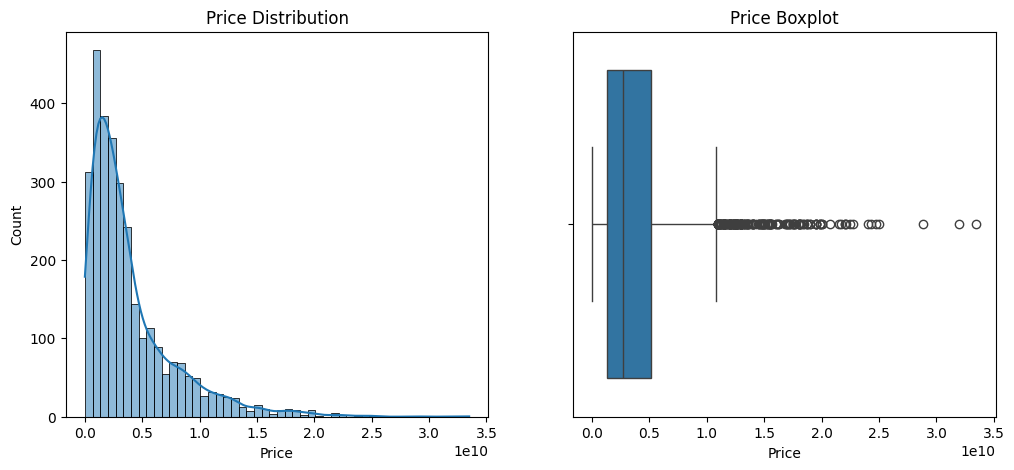

In [41]:

# رسم هیستوگرام و باکس‌پلات برای Price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Price Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Price"])
plt.title("Price Boxplot")

plt.show()

In [42]:
# محاسبه چارک اول (Q1) و سوم (Q3)
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# تعیین حد بالا برای مقدار پرت
upper_limit = Q3 + 1.5 * IQR

# نمایش مقدار حد بالا
print(f"حد بالای منطقی برای Price: {upper_limit}")

# تعداد مقدارهای پرت
outliers = df[df["Price"] > upper_limit]
print(f"تعداد مقدارهای پرت: {outliers.shape[0]}")

# حذف مقدارهای پرت
df_cleaned = df[df["Price"] <= upper_limit]

# نمایش تعداد داده‌ها قبل و بعد از حذف
print(f"تعداد داده‌های قبل از حذف مقدار پرت: {df.shape[0]}")
print(f"تعداد داده‌های بعد از حذف مقدار پرت: {df_cleaned.shape[0]}")

# آپدیت دیتافریم اصلی
df = df_cleaned


حد بالای منطقی برای Price: 10831250000.0
تعداد مقدارهای پرت: 205
تعداد داده‌های قبل از حذف مقدار پرت: 3036
تعداد داده‌های بعد از حذف مقدار پرت: 2831


In [43]:
# انتخاب ویژگی‌ها (همه ستون‌ها به جز Price)
X = df.drop(columns=["Price"])

# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تبدیل به DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# بررسی میانگین و انحراف معیار بعد از استانداردسازی
print(f"میانگین هر ویژگی بعد از استانداردسازی:\n{X_scaled.mean().round(2)}")
print(f"\nانحراف معیار هر ویژگی بعد از استانداردسازی:\n{X_scaled.std().round(2)}")

میانگین هر ویژگی بعد از استانداردسازی:
Area                   0.0
Room                   0.0
Parking               -0.0
Warehouse              0.0
Elevator               0.0
                      ... 
Address_Yousef Abad   -0.0
Address_Zafar         -0.0
Address_Zaferanieh    -0.0
Address_Zargandeh     -0.0
Address_Zibadasht      0.0
Length: 197, dtype: float64

انحراف معیار هر ویژگی بعد از استانداردسازی:
Area                   1.0
Room                   1.0
Parking                1.0
Warehouse              1.0
Elevator               1.0
                      ... 
Address_Yousef Abad    1.0
Address_Zafar          1.0
Address_Zaferanieh     1.0
Address_Zargandeh      1.0
Address_Zibadasht      1.0
Length: 197, dtype: float64


In [44]:
# متغیر هدف (Price)
y = df["Price"]

# تقسیم داده‌ها (۸۰٪ آموزش، ۲۰٪ تست)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ایجاد مدل رگرسیون خطی
lin_reg = LinearRegression()

# آموزش مدل روی داده‌های استاندارد شده آموزشی
lin_reg.fit(X_train, y_train)

# پیش‌بینی روی داده‌های آزمون
y_pred = lin_reg.predict(X_test)

# محاسبه معیارهای ارزیابی
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("میانگین مربعات خطا (MSE):", mse)
print("ضریب تعیین (R²):", r2)

میانگین مربعات خطا (MSE): 1.1490612167721311e+18
ضریب تعیین (R²): 0.7942907764895489
